# Libraries

In [20]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

%matplotlib widget

# PART 1: Random Walk visualizations in multiple dimensions

### Random Walk in 1D

In [21]:
n_steps = 1000
n_sims = 6
proba = 0.5
step_size = 1

simulation_data = pd.DataFrame()


def simulate_1d_rw(n_steps, p, step_size):
    steps = [1* step_size if random.random() < p else -1 * step_size for _ in range(n_steps)]
    y = np.cumsum(steps)
    x = list(range(len(y)))

    return x, list(y)

for i in range(1, n_sims):
    x, y = simulate_1d_rw(n_steps, proba, step_size)
    simulation_data['x'] = x
    simulation_data[f'y{i}'] = y


for i in range(1, n_sims):
    print(f'Final value of simulation {i} is {simulation_data[f'y{i}'].iloc[-1]}.')


Final value of simulation 1 is -40.
Final value of simulation 2 is -22.
Final value of simulation 3 is 4.
Final value of simulation 4 is -22.
Final value of simulation 5 is 24.


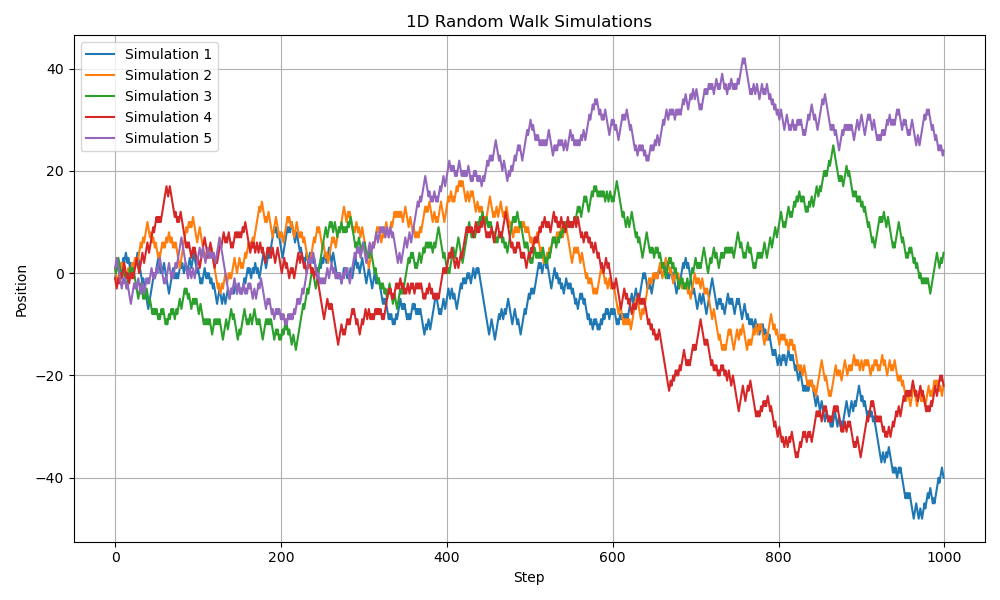

In [22]:
plt.figure(figsize  = (10,6))

for i in range(1, n_sims):
    plt.plot(simulation_data['x'], simulation_data[f'y{i}'], label = f'Simulation {i}')

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1D Random Walk Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Random Walk in 2D

In [23]:
n_steps = 10000
#n_sims = 6
step_size = 1

def simulate_2d_rw(nsteps, stepsize=1):

    deltas = [ (0,-1*stepsize), (-1*stepsize,0), (0,1*stepsize), (1*stepsize,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y

x, y = simulate_2d_rw(n_steps , step_size)

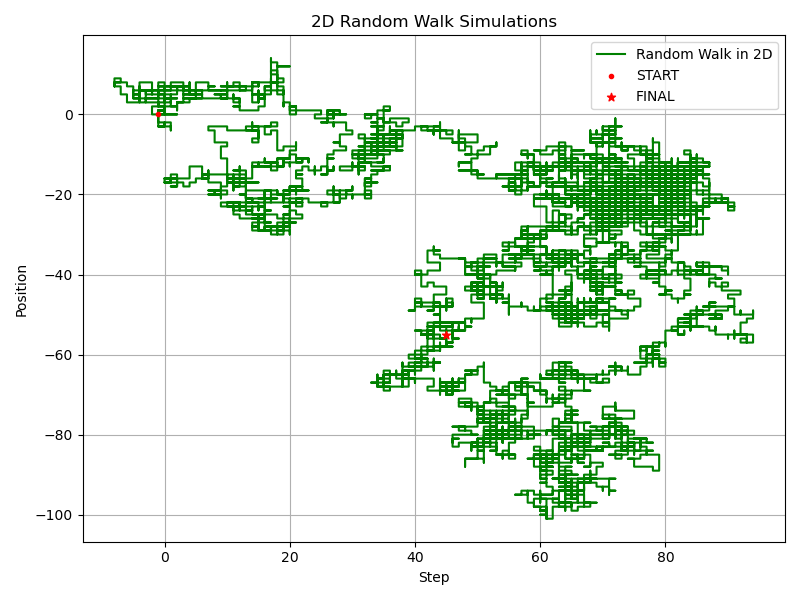

In [24]:
plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, y, color = 'green', label = 'Random Walk in 2D')

plt.scatter(x[0], y[0], color = 'red', marker = '.', label = 'START', zorder = 10)
plt.scatter(x[-1], y[-1], color = 'red', marker = '*', label = 'FINAL', zorder = 10)

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("2D Random Walk Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Random Walk in 3D

In [25]:
n_steps = 10000
#n_sims = 6
step_size = 1

def simulate_3d_rw(nsteps, stepsize=1):

    deltas = [ (0,-1*stepsize,0), (0,1*stepsize,0), (0,0,1*stepsize), (0,0, -1*stepsize),(-1*stepsize,0,0),(1*stepsize,0,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    z = list(steps[:,2])
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y, z

x, y, z = simulate_3d_rw(n_steps , step_size)

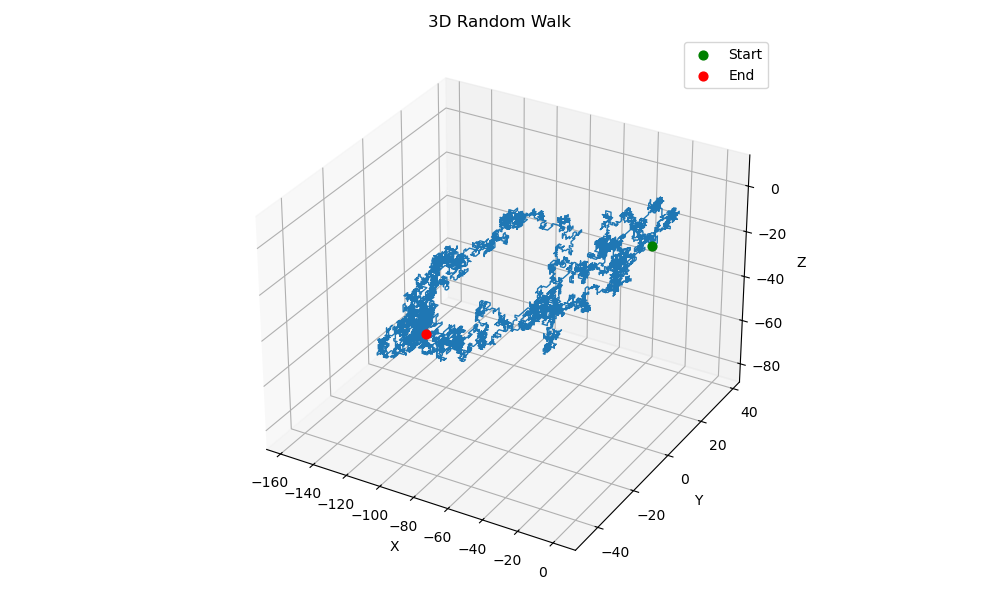

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linewidth=1)

ax.scatter(x[0], y[0], z[0], color="green", s=40, label="Start", zorder=10)
ax.scatter(x[-1], y[-1], z[-1], color="red",   s=40, label="End",   zorder=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Random Walk")

ax.legend()
plt.tight_layout()
plt.show()

# PART 2:  Brownian Motion as Limit of a Random Walk

Brownian motion can be obtained as the **scaling limit** of a simple symmetric random walk.  
Let  

$$
S_n = X_1 + X_2 + \dots + X_n,\qquad X_i \in \{-1,+1\},\ \mathbb{P}(X_i=1)=\mathbb{P}(X_i=-1)=\tfrac12.
$$

Define the rescaled process:

$$
W_n(t) = \frac{1}{\sqrt{n}}\, S_{\lfloor nt \rfloor},\qquad 0 \le t \le 1.
$$

As $n \to \infty$:

$$
W_n(t) \xRightarrow{d} B(t),
$$

where $B(t)$ is standard Brownian motion.

This convergence result is known as **Donsker’s invariance principle** or the **functional central limit theorem**.

In [27]:
def simulate_1d_bm(nsteps=1000, t=0.01):
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 6
simulation_data = pd.DataFrame()
for i in range(1, nsims):
    x, y = simulate_1d_bm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

for i in range(1, n_sims):
    print(f'Final value of simulation {i} is {simulation_data[f'y{i}'].iloc[-1]:.2f}.')

Final value of simulation 1 is 1.93.
Final value of simulation 2 is 7.08.
Final value of simulation 3 is 0.58.
Final value of simulation 4 is -1.87.
Final value of simulation 5 is -4.93.


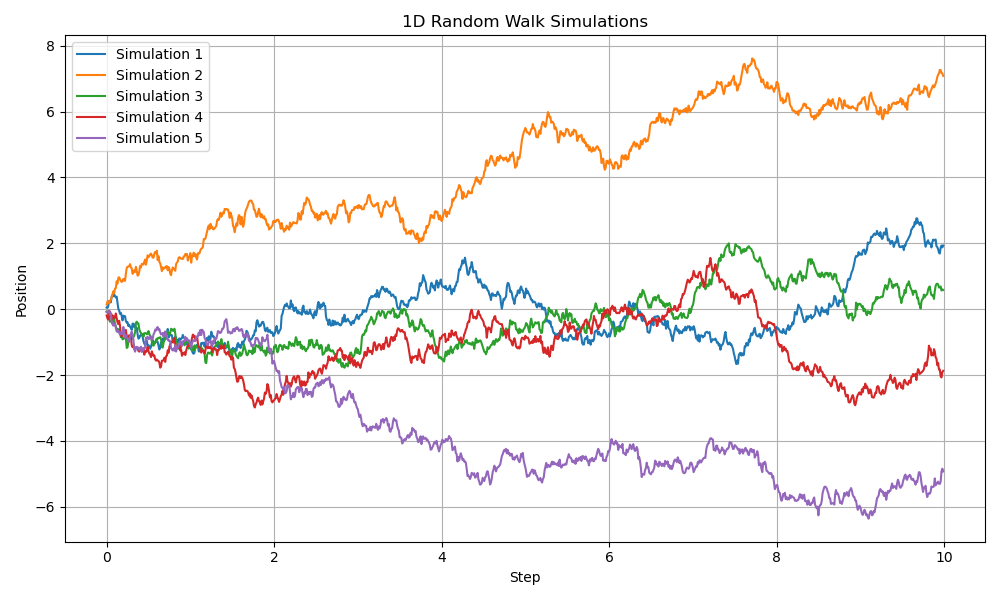

In [28]:
plt.figure(figsize  = (10,6))

for i in range(1, n_sims):
    plt.plot(simulation_data['x'], simulation_data[f'y{i}'], label = f'Simulation {i}')

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1D Random Walk Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [29]:
def simulate_2d_bm(nsteps=1000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y)


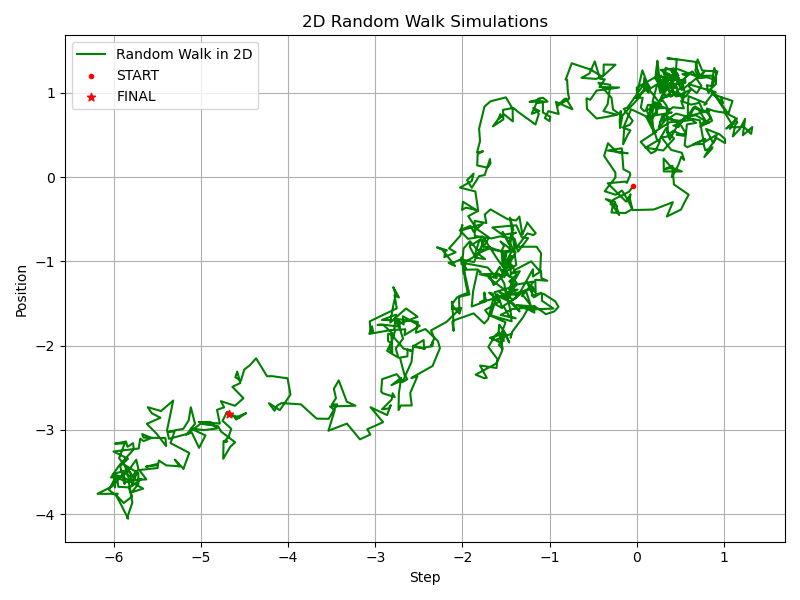

In [30]:
x, y = simulate_2d_bm()

plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, y, color = 'green', label = 'Random Walk in 2D')

plt.scatter(x[0], y[0], color = 'red', marker = '.', label = 'START', zorder = 10)
plt.scatter(x[-1], y[-1], color = 'red', marker = '*', label = 'FINAL', zorder = 10)

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("2D Random Walk Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [31]:
def simulate_3d_bm(nsteps=10000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    z = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y), list(z)

x, y, z = simulate_3d_bm()

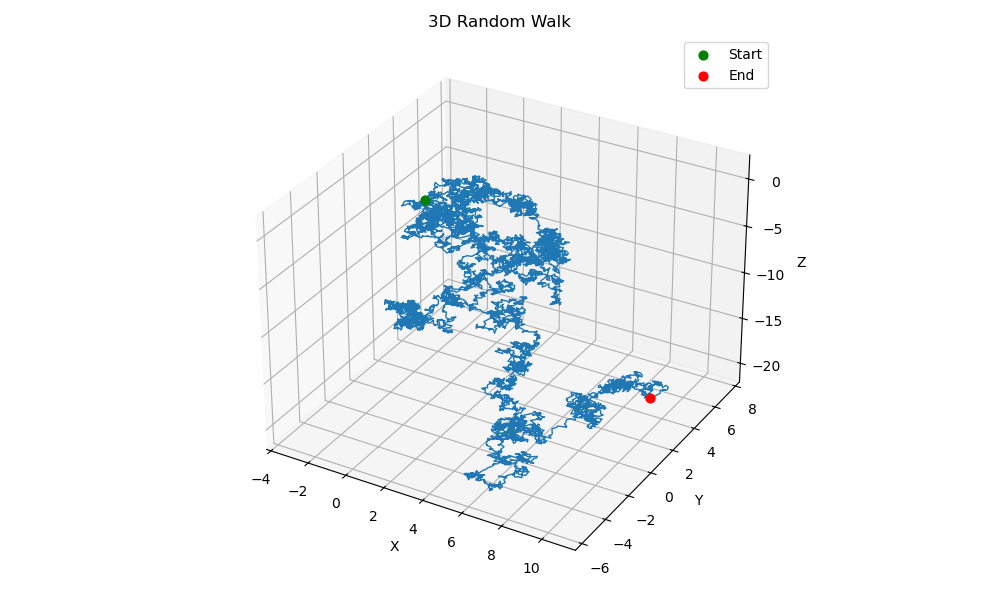

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linewidth=1)

ax.scatter(x[0], y[0], z[0], color="green", s=40, label="Start", zorder=10)
ax.scatter(x[-1], y[-1], z[-1], color="red",   s=40, label="End",   zorder=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Random Walk")

ax.legend()
plt.tight_layout()
plt.show()